In [2]:
import platform
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from utils import *
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_theme(style="ticks", palette="pastel")
if platform.system() == 'Windows':
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
else:  # Mac or other systems
    plt.rcParams['font.family'] = ['Arial Unicode MS']

# preprocess and load data
filepath = 'train_data.pkl'
if not os.path.exists(filepath):
    general_process(output_filepath=filepath)
with open(filepath, 'rb') as fin:
    df = pickle.load(fin)

C:\Users\1\AppData\Local\Temp\ipykernel_1732\3519548733.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\1\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df['flux_density_max'] = df['flux_density'].apply(lambda r: np.max(r))

In [4]:
df

,type_material,temp,freq,core_loss,type_waveform,flux_density,flux_density_max
0,1,25,50030,1997.955250,正弦波,"[0.000212759, 0.000389496, 0.00056608, 0.00074...",0.028849
1,1,25,50020,2427.749830,正弦波,"[-0.000550883, -0.000357918, -0.000165251, 2.7...",0.031419
2,1,25,50020,3332.725760,正弦波,"[-0.003779509, -0.003563773, -0.003348945, -0....",0.035535
3,1,25,50020,4502.908007,正弦波,"[-0.000510932, -0.000266662, -2.25e-05, 0.0002...",0.040015
4,1,25,50030,6063.023248,正弦波,"[0.000457688, 0.000732427, 0.00100655, 0.00128...",0.045028
...,...,...,...,...,...,...,...
12395,4,90,199190,20604.900210,梯形波,"[-0.017758287, -0.017339198, -0.016932051, -0....",0.034867
12396,4,90,199190,26504.284280,梯形波,"[-0.019690471, -0.019226928, -0.018775593, -0....",0.038341
12397,4,90,199190,46232.491530,梯形波,"[-0.024998103, -0.024410702, -0.02383819, -0.0...",0.048877
12398,4,90,199190,61458.085900,梯形波,"[-0.027987528, -0.027328599, -0.026686789, -0....",0.054889


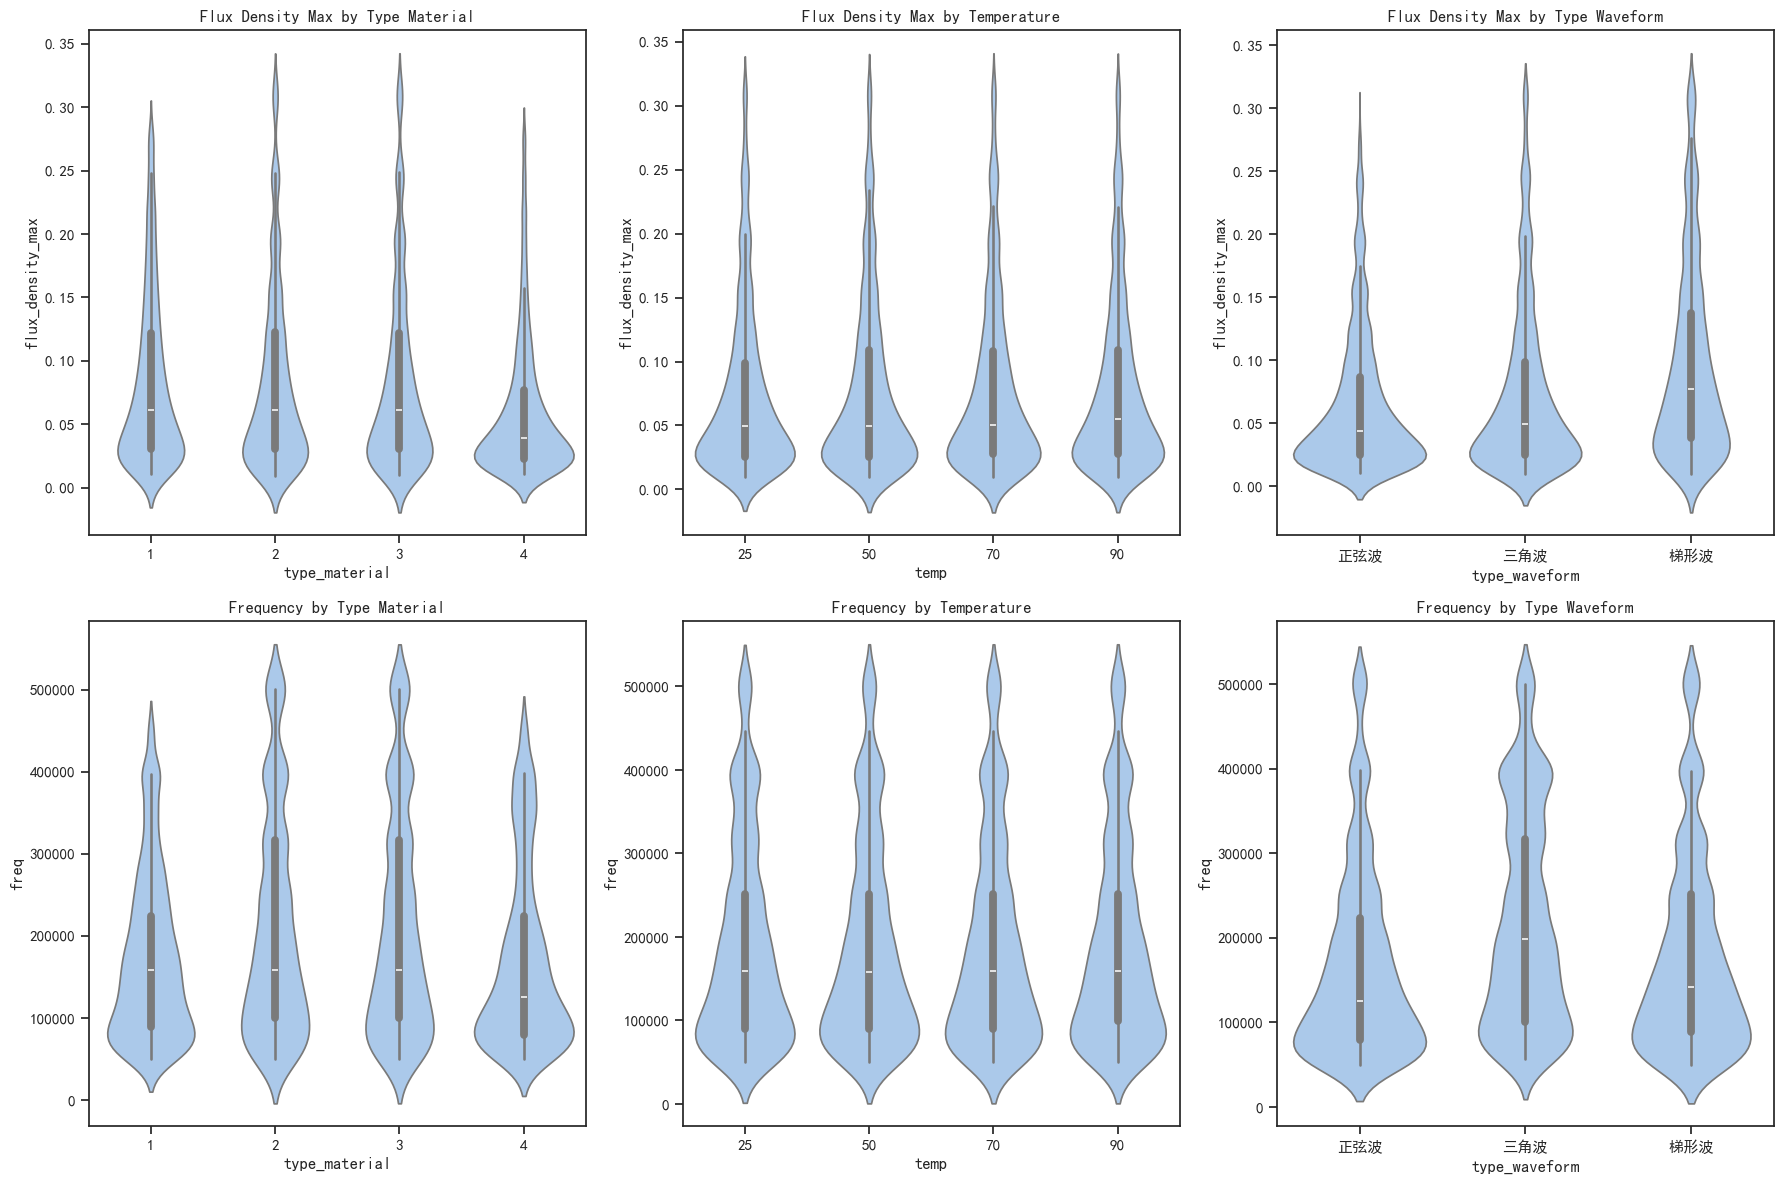

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.violinplot(data=df, x="type_material", y="flux_density_max", ax=axes[0, 0])
axes[0, 0].set_title('Flux Density Max by Type Material')

sns.violinplot(data=df, x="temp", y="flux_density_max", ax=axes[0, 1])
axes[0, 1].set_title('Flux Density Max by Temperature')

sns.violinplot(data=df, x="type_waveform", y="flux_density_max", ax=axes[0, 2])
axes[0, 2].set_title('Flux Density Max by Type Waveform')

sns.violinplot(data=df, x="type_material", y="freq", ax=axes[1, 0])
axes[1, 0].set_title('Frequency by Type Material')

sns.violinplot(data=df, x="temp", y="freq", ax=axes[1, 1])
axes[1, 1].set_title('Frequency by Temperature')

sns.violinplot(data=df, x="type_waveform", y="freq", ax=axes[1, 2])
axes[1, 2].set_title('Frequency by Type Waveform')

plt.tight_layout()
plt.savefig('p3a复杂图.pdf',bbox_inches='tight')


温度的单因素图

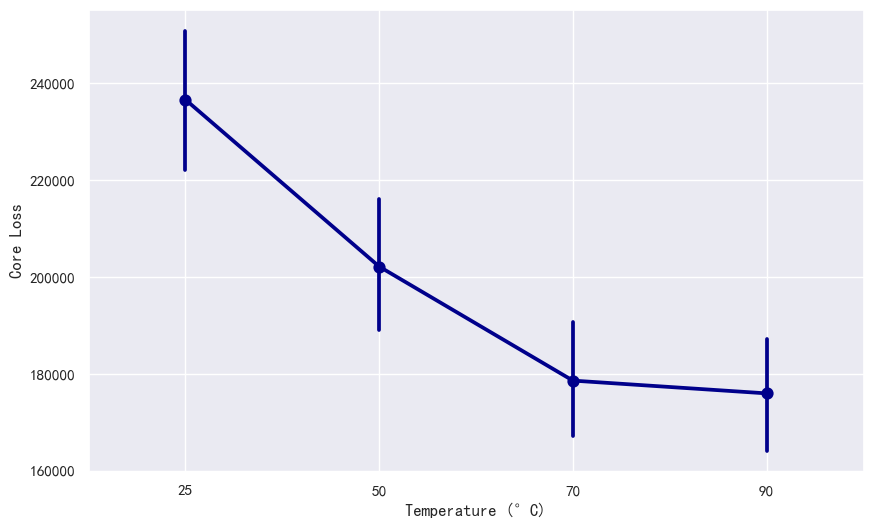

In [19]:
import seaborn as  sns
plt.figure(figsize=(10, 6))
sns.pointplot(x='temp', y='core_loss', data=df, markers='o', linestyles='-', color='darkblue')
plt.xlabel('Temperature (°C)')
plt.ylabel('Core Loss')
plt.grid(True)
plt.savefig('磁芯损耗关于温度的分布.pdf',bbox_inches='tight')


温度数据检验

In [7]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
temp    = 25  # 设定温度
core_loss_data = df[df['temp'] == temp]['core_loss']
# Shapiro-Wilk检验
shapiro_stat, p_value = stats.shapiro(core_loss_data)

# 输出结果
print(f'Shapiro-Wilk检验统计量: {shapiro_stat}, p值: {p_value}')



# 检验结果解释
alpha = 0.05
if p_value > alpha:
    print("接受原假设：数据服从正态分布")
else:
    print("拒绝原假设：数据不服从正态分布")

Shapiro-Wilk检验统计量: 0.5691900253295898, p值: 0.0
拒绝原假设：数据不服从正态分布


In [8]:
group_variable = 'temp'  # 分组变量
response_variable = 'core_loss'    # 响应变量

# 获取每个组的磁芯损耗数据
groups = df.groupby(group_variable)[response_variable].apply(list)

# Kruskal-Wallis H检验
kruskal_stat, p_value = stats.kruskal(*groups)

# 输出结果
print(f'Kruskal-Wallis H检验统计量: {kruskal_stat}, p值: {p_value}')

# 检验结果解释
alpha = 0.05
if p_value > alpha:
    print("接受原假设：不同温度之间的磁芯损耗没有显著差异")
else:
    print("拒绝原假设：不同温度之间的磁芯损耗存在显著差异")

Kruskal-Wallis H检验统计量: 67.70712386584215, p值: 1.321660771739844e-14
拒绝原假设：不同温度之间的磁芯损耗存在显著差异


材料的单因素图

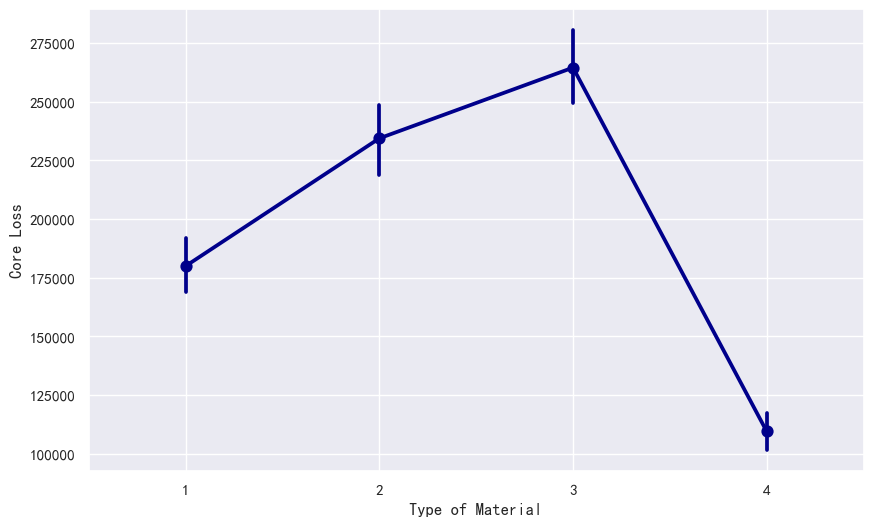

In [20]:

plt.figure(figsize=(10, 6))
sns.pointplot(x='type_material', y='core_loss', data=df, markers='o', linestyles='-', color='darkblue')
plt.xlabel('Type of Material')
plt.ylabel('Core Loss')
plt.grid(True)
plt.savefig('磁芯损耗关于材料的分布.pdf',bbox_inches='tight')


材料的数据检验

In [10]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
type_material = '1' 
core_loss_data = df[df['type_material'] == type_material]['core_loss']
# Shapiro-Wilk检验
shapiro_stat, p_value = stats.shapiro(core_loss_data)

# 输出结果
print(f'Shapiro-Wilk检验统计量: {shapiro_stat}, p值: {p_value}')



# 检验结果解释
alpha = 0.05
if p_value > alpha:
    print("接受原假设：数据服从正态分布")
else:
    print("拒绝原假设：数据不服从正态分布")

Shapiro-Wilk检验统计量: 0.5450851917266846, p值: 0.0
拒绝原假设：数据不服从正态分布


In [11]:
group_variable = 'type_material'  
response_variable = 'core_loss'    

# 获取每个组的磁芯损耗数据
groups = df.groupby(group_variable)[response_variable].apply(list)

# Kruskal-Wallis H检验
kruskal_stat, p_value = stats.kruskal(*groups)

# 输出结果
print(f'Kruskal-Wallis H检验统计量: {kruskal_stat}, p值: {p_value}')

# 检验结果解释
alpha = 0.05
if p_value > alpha:
    print("接受原假设：不同材料之间的磁芯损耗没有显著差异")
else:
    print("拒绝原假设：不同材料之间的磁芯损耗存在显著差异")

Kruskal-Wallis H检验统计量: 295.23013277264107, p值: 1.0717050080558543e-63
拒绝原假设：不同材料之间的磁芯损耗存在显著差异


损耗的分布

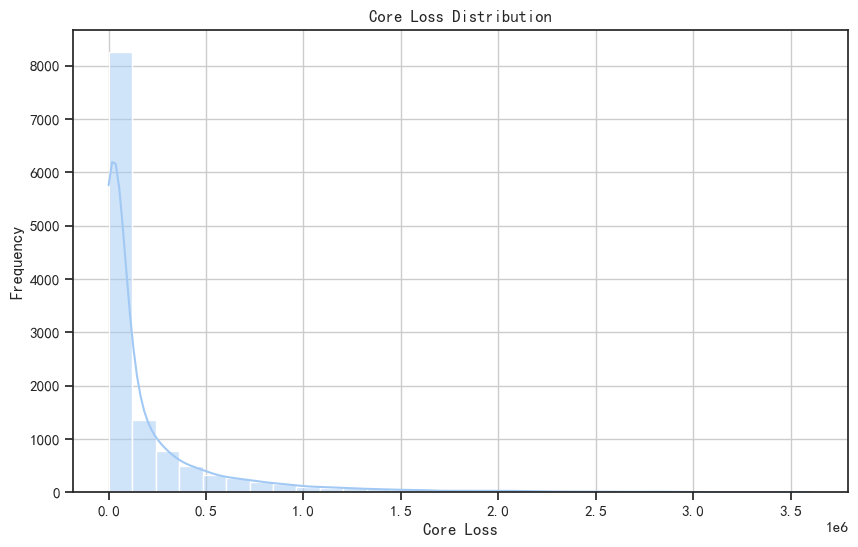

Shapiro-Wilk Test:
Statistic: 0.5593247413635254, p-value: 0.0

D'Agostino and Pearson's Test:
Statistic: 9247.752121860063, p-value: 0.0


In [12]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制磁芯损耗的直方图和KDE图
plt.figure(figsize=(10, 6))
sns.histplot(df['core_loss'], bins=30, kde=True)
plt.title('Core Loss Distribution')
plt.xlabel('Core Loss')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# 进行Shapiro-Wilk检验
shapiro_test = stats.shapiro(df['core_loss'])
print("Shapiro-Wilk Test:")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 进行D'Agostino和Pearson检验
normal_test = stats.normaltest(df['core_loss'])
print("\nD'Agostino and Pearson's Test:")
print(f"Statistic: {normal_test.statistic}, p-value: {normal_test.pvalue}")

波形的单因素图

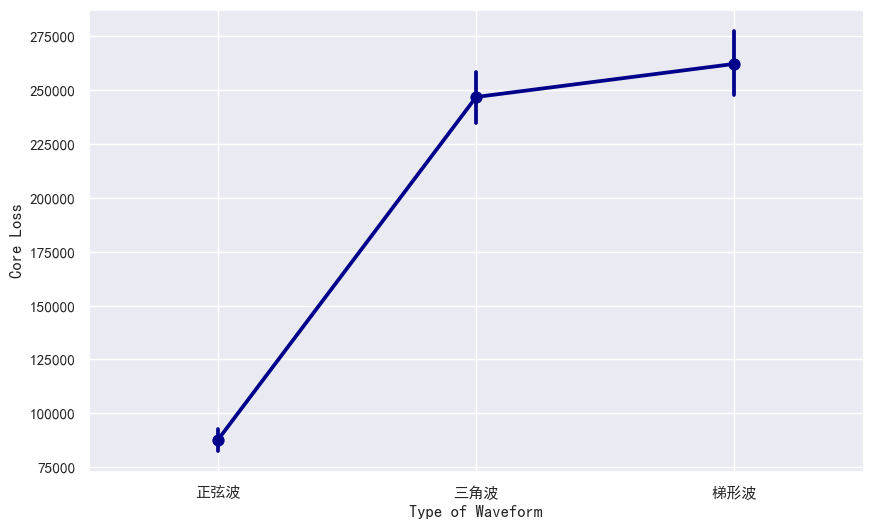

In [21]:


plt.figure(figsize=(10, 6))
sns.pointplot(x='type_waveform', y='core_loss', data=df, markers='o', linestyles='-', color='darkblue')
plt.xlabel('Type of Waveform')
plt.ylabel('Core Loss')
plt.grid(True)
plt.savefig('磁芯损耗关于波形的分布.pdf',bbox_inches='tight')


波形检验

In [14]:
type_waveform = '正弦波'  # 设定波形
core_loss_data = df[df['type_waveform'] == type_waveform]['core_loss']
# Shapiro-Wilk检验
shapiro_stat, p_value = stats.shapiro(core_loss_data)

# 输出结果
print(f'Shapiro-Wilk检验统计量: {shapiro_stat}, p值: {p_value}')

# 检验结果解释
alpha = 0.05
if p_value > alpha:
    print("接受原假设：数据服从正态分布")
else:
    print("拒绝原假设：数据不服从正态分布")

Shapiro-Wilk检验统计量: 0.6216257810592651, p值: 0.0
拒绝原假设：数据不服从正态分布


In [15]:
group_variable = 'type_waveform'  # 分组变量
response_variable = 'core_loss'    # 响应变量

# 获取每个组的磁芯损耗数据
groups = df.groupby(group_variable)[response_variable].apply(list)

# Kruskal-Wallis H检验
kruskal_stat, p_value = stats.kruskal(*groups)

# 输出结果
print(f'Kruskal-Wallis H检验统计量: {kruskal_stat}, p值: {p_value}')

# 检验结果解释
alpha = 0.05
if p_value > alpha:
    print("接受原假设：不同波形之间的磁芯损耗没有显著差异")
else:
    print("拒绝原假设：不同波形之间的磁芯损耗存在显著差异")

Kruskal-Wallis H检验统计量: 819.8756854292031, p值: 9.252455088977447e-179
拒绝原假设：不同波形之间的磁芯损耗存在显著差异


同一温度下不同材料对应的磁芯损耗分布

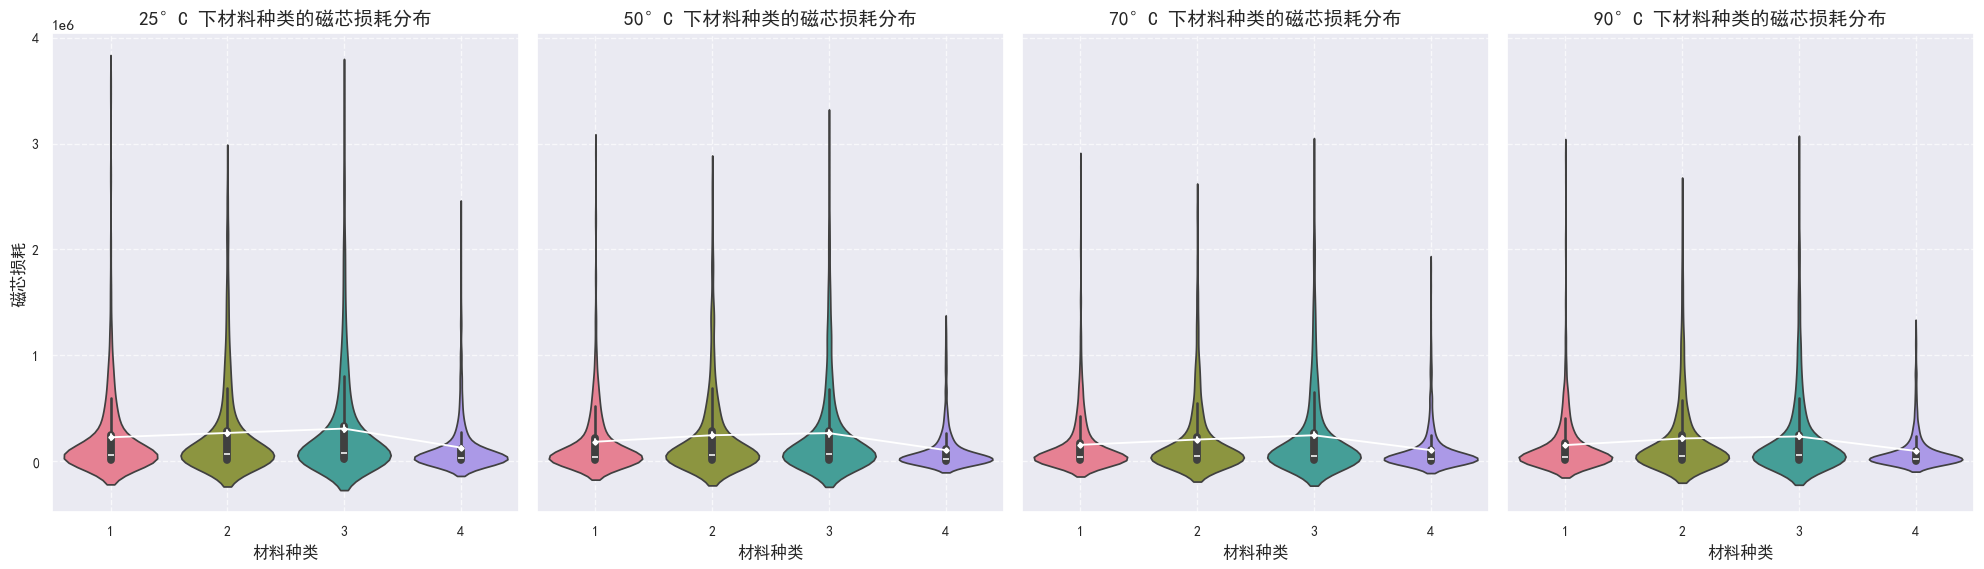

In [22]:
# 假设 df 是你的数据框，并且已经加载了数据

# 获取不同温度的唯一值并排序
unique_temps = sorted(df['temp'].unique())

# 设置绘图风格和颜色主题
sns.set_style("darkgrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
colors = sns.color_palette("husl", n_colors=len(df['type_material'].unique()))

# 创建子图
fig, axes = plt.subplots(1, len(unique_temps), figsize=(20, 6), sharey=True)

# 遍历每种温度，绘制小提琴图
for i, temp in enumerate(unique_temps):
    sns.violinplot(x='type_material', y='core_loss', data=df[df['temp'] == temp], ax=axes[i], palette=colors)
    sns.pointplot(x='type_material', y='core_loss', data=df[df['temp'] == temp], color='white', markers='D', scale=0.5, ax=axes[i])
    
    axes[i].set_title(f'{temp}°C 下材料种类的磁芯损耗分布', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('材料种类', fontsize=12)
    if i == 0:
        axes[i].set_ylabel('磁芯损耗', fontsize=12)
    else:
        axes[i].set_ylabel('')
    
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.7)



# 调整布局
plt.tight_layout()
plt.savefig('p3a同一温度下材料种类的磁芯损耗分布.pdf',bbox_inches='tight')

同一温度下不同波形对应的磁芯损耗分布

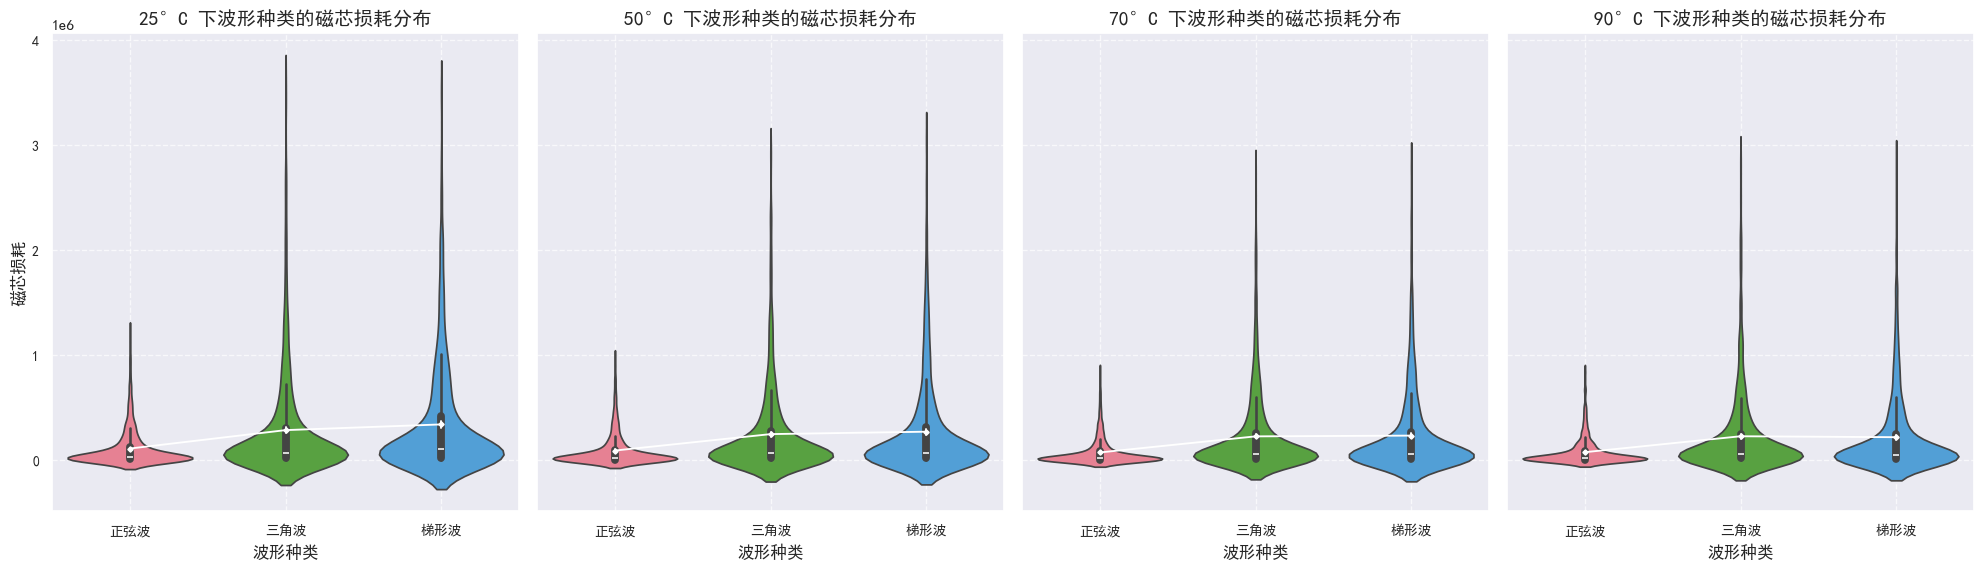

In [23]:
# 假设 df 是你的数据框，并且已经加载了数据

# 获取不同温度的唯一值并排序
unique_temps = sorted(df['temp'].unique())

# 设置绘图风格和颜色主题
sns.set_style("darkgrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
colors = sns.color_palette("husl", n_colors=len(df['type_waveform'].unique()))

# 创建子图
fig, axes = plt.subplots(1, len(unique_temps), figsize=(20, 6), sharey=True)

# 遍历每种温度，绘制小提琴图
for i, temp in enumerate(unique_temps):
    sns.violinplot(x='type_waveform', y='core_loss', data=df[df['temp'] == temp], ax=axes[i], palette=colors)
    sns.pointplot(x='type_waveform', y='core_loss', data=df[df['temp'] == temp], color='white', markers='D', scale=0.5, ax=axes[i])
    
    axes[i].set_title(f'{temp}°C 下波形种类的磁芯损耗分布', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('波形种类', fontsize=12)
    if i == 0:
        axes[i].set_ylabel('磁芯损耗', fontsize=12)
    else:
        axes[i].set_ylabel('')
    
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.7)



# 调整布局
plt.tight_layout()
plt.savefig('p3a同一温度下波形种类的磁芯损耗分布.pdf',bbox_inches='tight')


同一材料下不同波形对应的磁芯损耗分布

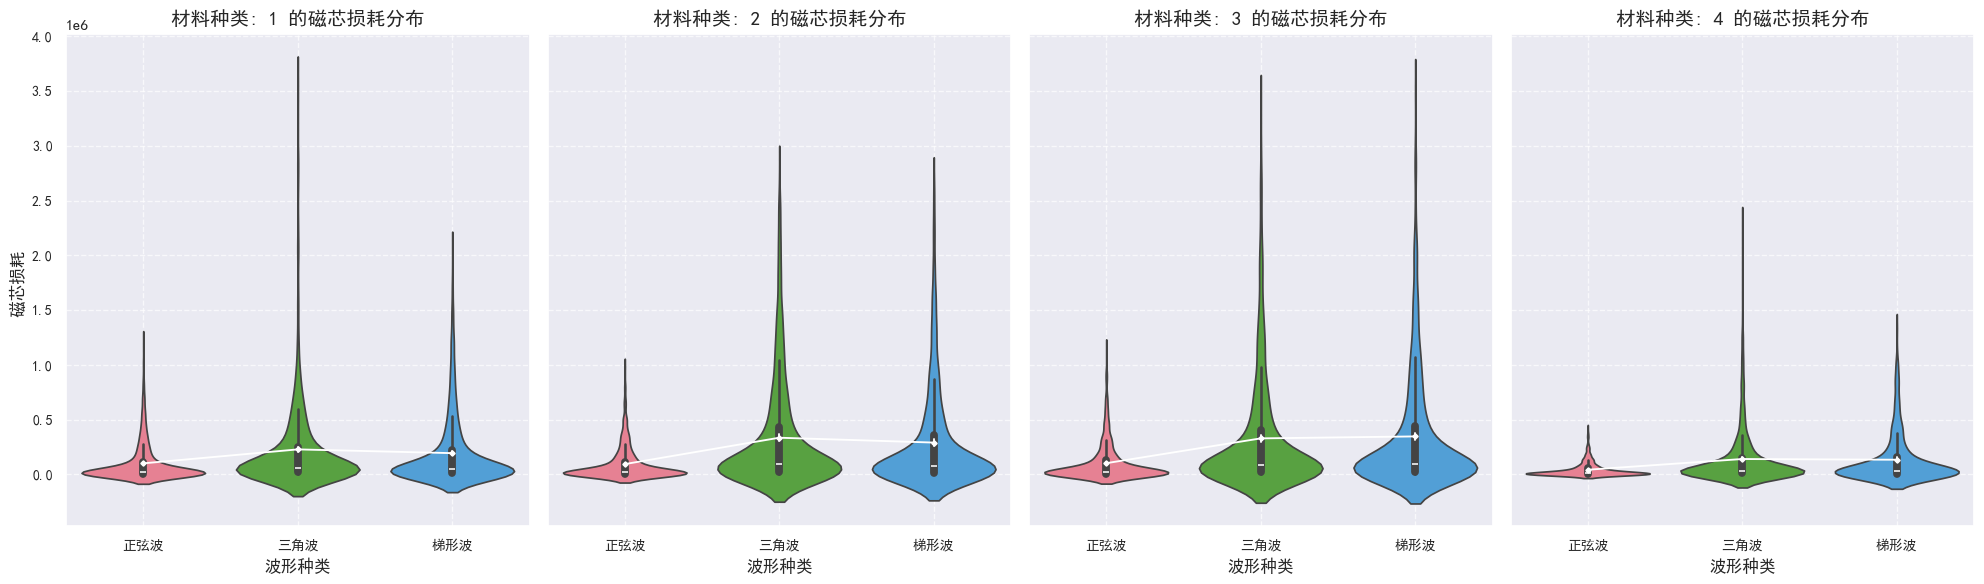

In [24]:
# 假设 df 是你的数据框，并且已经加载了数据

unique_materials = sorted(df['type_material'].unique())

# 设置绘图风格
sns.set_style('darkgrid')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
colors =sns.color_palette("husl",n_colors=len(df['type_waveform'].unique()))

# 创建子图
fig, axes = plt.subplots(1, len(unique_materials), figsize=(20, 6),sharey=True)

# 遍历每种材料，绘制小提琴图
for i, material in enumerate(unique_materials):
    sns.violinplot(x='type_waveform', y='core_loss', data=df[df['type_material'] == material], ax=axes[i], palette=colors)
    sns.pointplot(x='type_waveform', y='core_loss', data=df[df['type_material'] == material], color='white', markers='D', scale=0.5, ax=axes[i])
    
    colors = sns.color_palette("husl", n_colors=len(df['type_waveform'].unique()))
   
    axes[i].set_title(f'材料种类: {material} 的磁芯损耗分布', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('波形种类', fontsize=12)
    if i == 0:
        axes[i].set_ylabel('磁芯损耗 ', fontsize=12)
    else:
        axes[i].set_ylabel('')
    
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.7)

# 调整布局
plt.tight_layout()
plt.savefig('p3a不同材料下波形种类的磁芯损耗分布.pdf',bbox_inches='tight')